In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib

C:\Users\nnkhi\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [9]:
diabetesDF = pd.read_csv('diabetes.csv')
print(diabetesDF.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [10]:
diabetesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

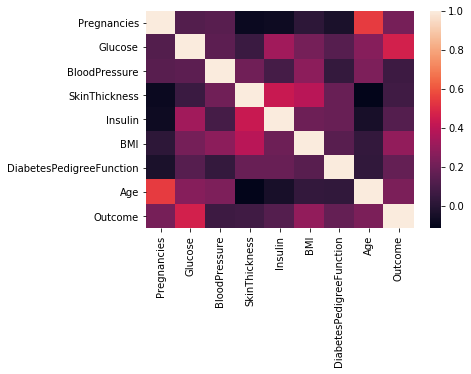

In [4]:
corr = diabetesDF.corr()
print(corr)
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

In [11]:
dfTrain = diabetesDF[:650]
dfTest = diabetesDF[650:750]
dfCheck = diabetesDF[750:]

In [12]:
trainLabel = np.asarray(dfTrain['Outcome'])
trainData = np.asarray(dfTrain.drop('Outcome',1))
testLabel = np.asarray(dfTest['Outcome'])
testData = np.asarray(dfTest.drop('Outcome',1))

In [14]:
means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)
trainData = (trainData - means)/stds
testData = (testData - means)/stds

In [15]:
diabetesCheck = LogisticRegression()
diabetesCheck.fit(trainData, trainLabel)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
accuracy = diabetesCheck.score(testData, testLabel)
print("accuracy = ", accuracy * 100, "%")

accuracy =  78.0 %


Text(0.5, 0, 'Importance')

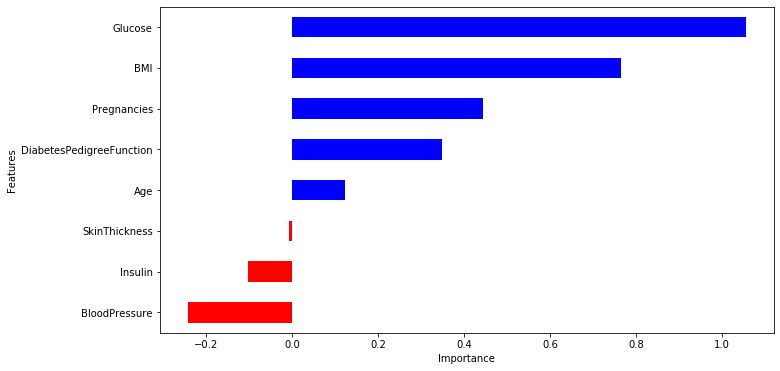

In [31]:
coeff = list(diabetesCheck.coef_[0])
labels = ['Pregnancies',  'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

In [32]:
print(dfCheck.head())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
750            4      136             70              0        0  31.2   
751            1      121             78             39       74  39.0   
752            3      108             62             24        0  26.0   
753            0      181             88             44      510  43.3   
754            8      154             78             32        0  32.4   

     DiabetesPedigreeFunction  Age  Outcome  
750                     1.182   22        1  
751                     0.261   28        0  
752                     0.223   25        0  
753                     0.222   26        1  
754                     0.443   45        1  


In [36]:
joblib.dump([diabetesCheck, means, stds], 'diabeteseModel.pkl')

diabetesLoadedModel, means, stds = joblib.load('diabeteseModel.pkl')
accuracyModel = diabetesLoadedModel.score(testData, testLabel)
print("accuracy = ",accuracyModel * 100,"%")

print(dfCheck.head())

sampleData = dfCheck[:1]

# prepare sample
sampleDataFeatures = np.asarray(sampleData.drop('Outcome',1))
sampleDataFeatures = (sampleDataFeatures - means)/stds

# predict
predictionProbability = diabetesLoadedModel.predict_proba(sampleDataFeatures)
prediction = diabetesLoadedModel.predict(sampleDataFeatures)

accuracy =  78.0 %
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
750            4      136             70              0        0  31.2   
751            1      121             78             39       74  39.0   
752            3      108             62             24        0  26.0   
753            0      181             88             44      510  43.3   
754            8      154             78             32        0  32.4   

     DiabetesPedigreeFunction  Age  Outcome  
750                     1.182   22        1  
751                     0.261   28        0  
752                     0.223   25        0  
753                     0.222   26        1  
754                     0.443   45        1  


In [37]:
print('Probability:', predictionProbability)
print('prediction:', prediction)

Probability: [[0.44077634 0.55922366]]
prediction: [1]
